## Customer Segmentation using RFM and Clustering Analysis

### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### The objective of the project is to categorize customers into various clusters (based on past data) to identify customers who are likely to respond to promotions and also for future personalization services that would help in increased sales and reduced customer churn rate using RFM Analysis that helps to retain customers and increase user engagement.


In [52]:
#Loading Packages
import numpy as np 
import pandas as pd 

import time, warnings
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
from scipy.stats import norm


warnings.filterwarnings("ignore")

In [53]:
#load the dataset
df = pd.read_csv('ecommerce.csv',encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France


In [54]:
#The list of attributes present in our dataset
list (df)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [55]:
#Characteristics of attributes present in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [56]:
# Counting the number of records present for each country
type_counts = df['Country'].value_counts()
Country=pd.DataFrame(type_counts)
Country.head()

,Country
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533


In [57]:
#Descriptive Statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [58]:
#Limiting our dataset for a single country United Kingdom for better analysis
df1 = df[df['Country']=='United Kingdom']
df1.shape

(495478, 8)

In [76]:
#Eliminating records where quatity is less than 0 or order was canceled
df1 = df1[df1['Quantity']>0]
df1.shape

(486286, 8)

In [77]:
#Eliminating records where unit price is less than 0
df1 = df1[df1['UnitPrice']>0]
df1.shape

(485123, 8)

In [78]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
df1 = df1[df1['InvoiceDate']>= "2010-12-09"]
df1.shape

(466781, 8)

In [79]:
#Calculating the Null Values for each Attribute
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     124327
Country             0
dtype: int64

In [80]:
print("Summary:")
#exploring the unique values of each attribute
print("Number of transactions: ", df1['InvoiceNo'].nunique())
print("Number of products bought: ",df1['StockCode'].nunique())
print("Number of customers:", df1['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df1['CustomerID'].isnull().sum() * 100 / len(df1),2),"%" )
print("Percentage of Descriptions NA: ", round(df1['Description'].isnull().sum() * 100 / len(df1),2),"%" )

Summary:
Number of transactions:  17339
Number of products bought:  3883
Number of customers: 3862
Percentage of customers NA:  26.63 %
Percentage of Descriptions NA:  0.0 %


In [81]:
#Dropped the country column as we do not need it anymore
df1.drop(['Country'], axis=1, inplace=True)

In [82]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,466781.000000,466781.000000,342454.000000
mean,9.675289,3.802189,15543.746737
std,164.877730,28.973742,1591.333769
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14191.000000
50%,3.000000,2.080000,15511.000000
75%,10.000000,4.130000,16928.000000
max,80995.000000,11062.060000,18287.000000


In [83]:
# Finding CustomerID with max qty on one order
df1[df1['Quantity']==80995.000000]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 9:15,2.08,16446.0


In [84]:
# Customer ID with max qty on one order
df1[df1['CustomerID']==16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 9:52,1.65,16446.0
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 9:52,1.25,16446.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 9:15,2.08,16446.0


In [85]:
# Finding Max UnitPrice on one order
df1[df1['UnitPrice']==11062.060000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50,11062.06,NaN


In [92]:
# # Deleting records with description "Bad Debt" as they are not a revenue of business
df5 = df4.drop([299982], axis=0)

In [86]:
#Removing DOTCOM POSTAGE records from description as they are not a product for business
df2=df1[df1.Description != 'DOTCOM POSTAGE']

In [87]:
#Removing POSTAGE records from description as they are not a product for business
df3=df2[df2.Description != 'POSTAGE']

In [88]:
#Removing MANUAL records from description as they are not a product for business
df4=df3[df3.Description !='MANUAL']

In [90]:
# Deleting outliers record with description "Bank Charges of 1cent"
df5 = df4.drop([361741], axis=0)
df5 = df4.drop([268028], axis = 0)
df5 = df4.drop([374542], axis = 0)
df5 = df4.drop([297438], axis = 0)

In [93]:
df5.describe()

,Quantity,UnitPrice,CustomerID
count,466038.000000,466038.000000,342411.000000
mean,9.689090,3.344317,15543.808701
std,165.008747,11.558570,1591.350338
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14191.000000
50%,3.000000,2.080000,15511.000000
75%,10.000000,4.130000,16928.000000
max,80995.000000,4287.630000,18287.000000


### We have 1,24,327 (26.63 %) Blank/(NA) CustomerID , we can completely remove those records, but for this case we have filled blank customerID records with a random customerID( 88888) as we want a better analysis and don't want to lose more than 25% of our data 

In [95]:
#Replacing the Blank CustomerID's with '88888'
df5['CustomerID'].fillna(88888, inplace=True)

In [96]:
print("Summary:")
#exploring the unique values of each attribute
print("Number of transactions: ", df5['InvoiceNo'].nunique())
print("Number of products sold: ",df5['StockCode'].nunique())
print("Number of customers:", df5['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df5['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print("Percentage of Descriptions NA: ", round(df5['Description'].isnull().sum() * 100 / len(df),2),"%" )

Summary:
Number of transactions:  17298
Number of products sold:  3880
Number of customers: 3863
Percentage of customers NA:  0.0 %
Percentage of Descriptions NA:  0.0 %


### RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

### RECENCY (R): Days since last purchase FREQUENCY (F): Total number of purchases MONETARY VALUE (M): Total money this customer spent.

### To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [98]:
#last date available in our dataset
df5['InvoiceDate'].max()

'2011-12-09 9:46'

In [99]:
#create a new column called date which contains the date of invoice only
df5['date'] = pd.DatetimeIndex(df5['InvoiceDate']).date
df5.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 8:34,3.95,14243.0,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 8:34,4.65,14243.0,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 8:34,2.55,14243.0,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 8:34,7.95,14243.0,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 8:34,7.95,14243.0,2010-12-09


In [100]:
#group by customers and check last date of purshace
recency_df = df5.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [101]:
#Printing the most recent date in our dataset
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [102]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [103]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [104]:
#dropped LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

### Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [105]:
# drop duplicates
df_copy = df2
df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
# #calculate frequency of purchases
frequency_df = df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,195
3,12749.0,5
4,12820.0,4


### Monetary attribute answers the question: How much money did the customer spent over time?

### To do that, first, we will create a new column total cost to have the total price per invoice.

In [106]:
#create column total cost
df2['TotalCost'] = df2['Quantity'] * df2['UnitPrice']


In [107]:
#Calculating the Monetary value for each customer
monetary_df = df2.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,658.89
2,12748.0,3739.23
3,12749.0,98.35
4,12820.0,58.20


In [108]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,10
2,12748.0,0,195
3,12749.0,3,5
4,12820.0,3,4


In [109]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()
rfm_df.shape

(3862, 3)

In [110]:
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,658.89
12748.0,0,195,3739.23
12749.0,3,5,98.35
12820.0,3,4,58.20
...,...,...,...
18280.0,277,1,23.70
18281.0,180,1,5.04
18282.0,7,2,38.25


In [111]:
f= rfm_df['Monetary'].sum()
f

1113718.22

In [112]:
# RFM Verification
df2[df2['CustomerID']==18287.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalCost
198716,554065,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12,2011-05-22 10:39,0.85,18287.0,10.2
392716,570715,22865,HAND WARMER OWL DESIGN,12,2011-10-12 10:23,2.10,18287.0,25.2
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 9:29,1.25,18287.0,45.0


In [115]:
#Dividing out dataset into Quartiles for creating RFM Score
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.400
0.50,49.0,2.0,45.000
0.75,134.0,5.0,121.625


In [116]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def MScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [117]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(MScore, args=('Monetary',quantiles,))

In [118]:
rfm_segmentation.head(5)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,10,658.89,4,4,4
12748.0,0,195,3739.23,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


In [119]:
#Concatinating the R_Quartile,F_Quartile and M_Quartile to get fina RFM Score
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,10,658.89,4,4,4,444
12748.0,0,195,3739.23,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


In [120]:
#Summary of customer dispersion
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']== 4]))   
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='222']))
print('Obsolete Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  356
Loyal Customers:  752
Big Spenders:  966
Almost Lost:  101
Obsolete Customers:  353


In [121]:
#Saving our Dataset
rfm_segmentation.to_csv('rfm_segmentation_TableOL.csv')

In [122]:
#Loading the Dataset for further Analysis
RFM = pd.read_csv(r"C:\Users\ashwi\CBU\Capstone Project\1\rfm_segmentation_TableOL.csv",encoding="ISO-8859-1")
RFM

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12747.0,2,10,658.89,4,4,4,444
2,12748.0,0,195,3739.23,4,4,4,444
3,12749.0,3,5,98.35,4,3,3,433
4,12820.0,3,4,58.20,4,3,3,433
...,...,...,...,...,...,...,...,...
3857,18280.0,277,1,23.70,1,1,2,112
3858,18281.0,180,1,5.04,1,1,1,111
3859,18282.0,7,2,38.25,4,2,2,422
3860,18283.0,3,16,66.75,4,4,3,443


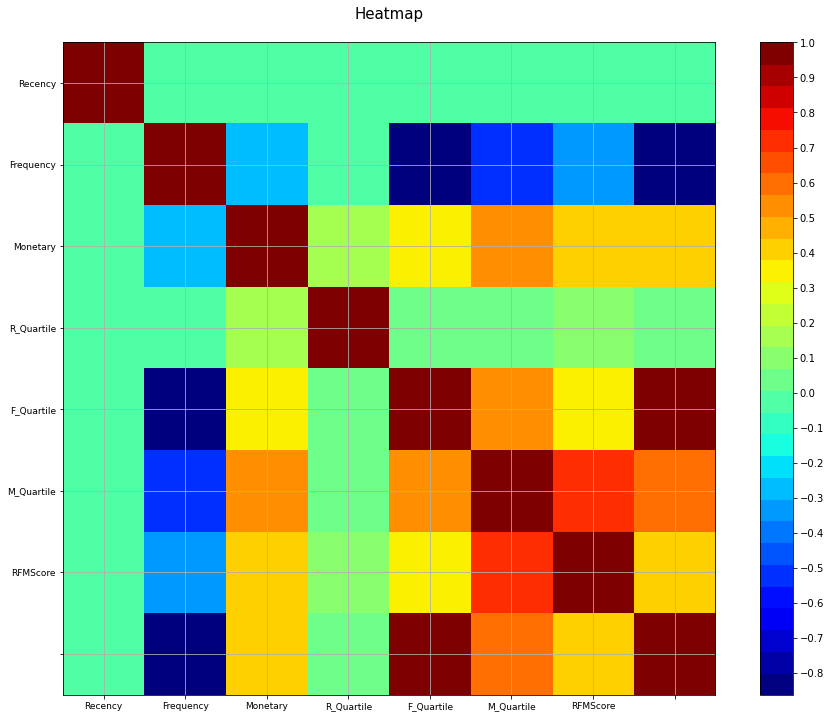

In [123]:
#Creating the Heatmap to find Correlation among the Attributes
def correlation_matrix(RFM):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(RFM.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Heatmap\n',fontsize=15)
    labels=RFM.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(RFM)


### High correlation between RFMScore and M_Quartile column so we have removed M_Quartile

In [124]:
#Removed M_Quatrile
RFM = RFM.drop('M_Quartile',axis=1)


In [125]:
# Removing (statistical) outliers for Recency
Q1 = RFM.Recency.quantile(0.05)
Q3 = RFM.Recency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = RFM.Frequency.quantile(0.05)
Q3 = RFM.Frequency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Monetary
Q1 = RFM.Monetary.quantile(0.05)
Q3 = RFM.Monetary.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Monetary >= Q1 - 1.5*IQR) & (RFM.Monetary <= Q3 + 1.5*IQR)]


In [126]:
RFM.shape

(3753, 7)

Text(0.5, 0, 'Attributes')

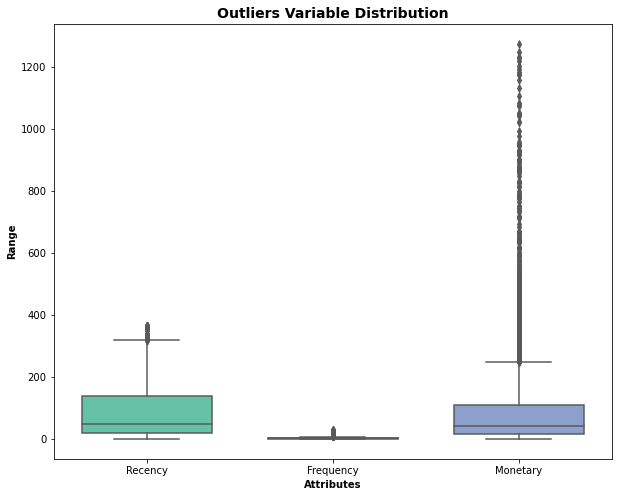

In [127]:
# Outlier Analysis of Amount Frequency and Recency
import matplotlib.pyplot as plt
import seaborn as sns

attributes = ['Recency','Frequency','Monetary',]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Text(0.5, 0, 'Attributes')

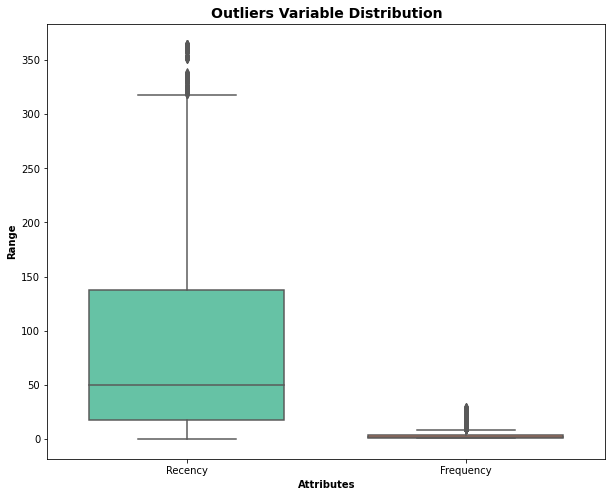

In [128]:
#Boxplot for  Recency, Frequency
import matplotlib.pyplot as plt
import seaborn as sns

attributes = ['Recency','Frequency',]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Text(0.5, 0, 'Attributes')

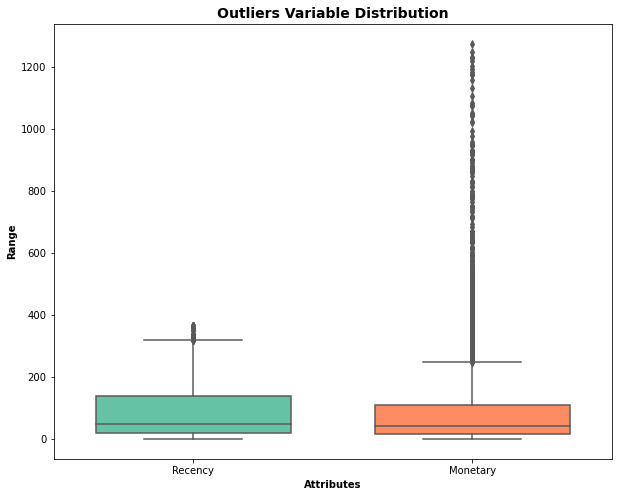

In [129]:
 #Outlier Analysis of Amount Frequency and Recency
import matplotlib.pyplot as plt
import seaborn as sns

attributes = ['Recency','Monetary',]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Text(0.5, 0, 'Attributes')

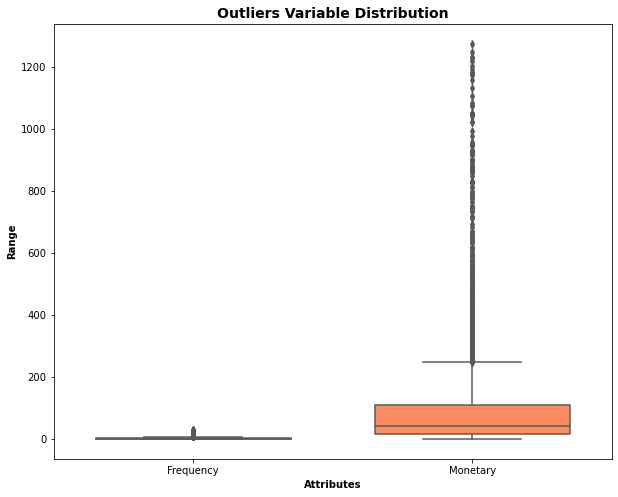

In [130]:
 #Outlier Analysis of Amount Frequency and Recency
import matplotlib.pyplot as plt
import seaborn as sns

attributes = ['Frequency','Monetary',]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

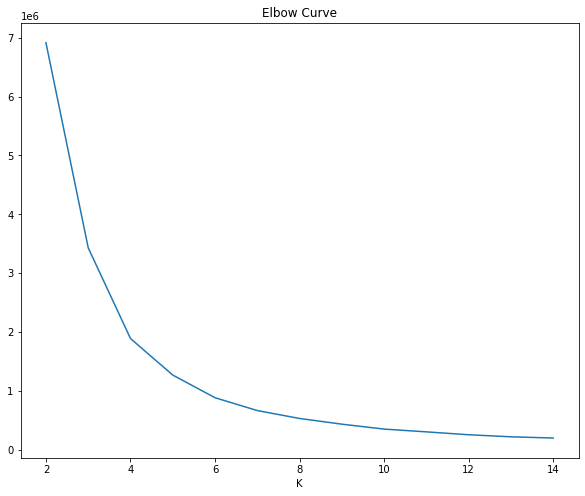

In [131]:
#Using the elbow method to find the optimal number of K from a range of 2-15 for performing KMeans Clustering
sse = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(RFM[['Recency','Frequency']])
    
    #SSE for each n_clusters
    sse.append(kmeans.inertia_) 
 
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.xlabel('K')
plt.show()

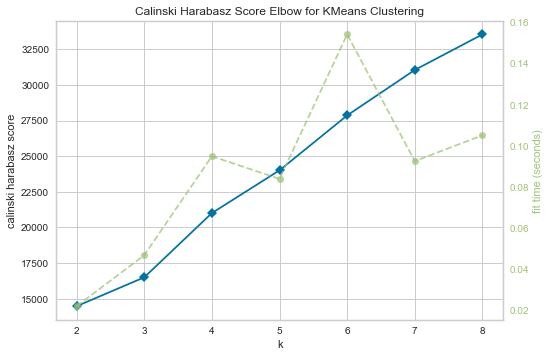

In [132]:
#Using Calinski Harabasz method to find a right number of K
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,9), metric='calinski_harabasz')

# Fit the data to the visualizer
visualizer.fit(RFM[['Recency','Frequency']])      
visualizer.show() 

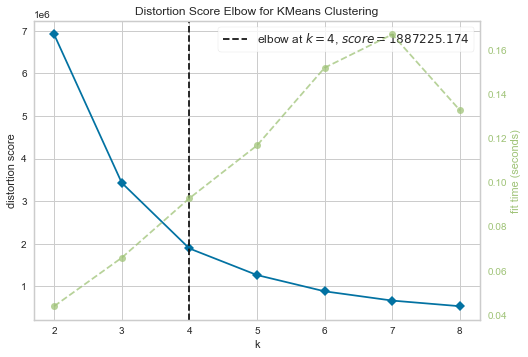

In [133]:
#Using silhouette method to find a right number of K
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,9), metric='distortion',
)

visualizer.fit(RFM[['Recency','Frequency']])        # Fit the data to the visualizer
visualizer.show()       